<a href="https://colab.research.google.com/github/1siddhi7/Learning-From-Data/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to SVM:**

---


Support Vector Machine (SVM) is a model that is used for classification. The concept is similar to that of the perceptron learning algorithm (i.e, we find a hyperplane which acts as a decision boundary between various classes). 

Any of the hyperplane correctly classifying the data can be valid decision boundary given by PLA; but SVM is based on the idea of finding a hyperplane that best divides a dataset into the given classes (it does so by maximizing the margin).

In [61]:
#Importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
!pip install qpsolvers
from cvxopt import matrix, solvers
from qpsolvers import solve_qp
import copy

In [0]:
def gen_data():
  
  '''function to generate linearly separable dataset'''
  x_l = np.random.uniform(-5,5,120)
  y_l = 5*x_l + 3 + np.random.uniform(5,15,120)
  xl = list(x_l)
  yl = list(y_l)

  data = []
  for i in range(120):
    data.append([[1,xl[i],yl[i]],1])

  x_r = np.random.uniform(-5,5,120)
  y_r = 5*x_r + 3 - np.random.uniform(1,15,120)
  xr = list(x_r)
  yr = list(y_r)

  for i in range(120):
    data.append([[1,xr[i],yr[i]],-1])
  
  random.shuffle(data)
  return data

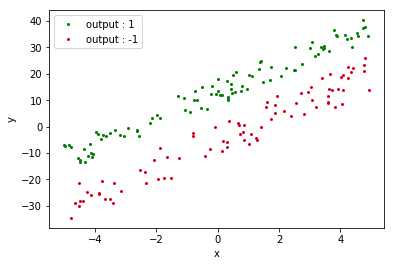

In [63]:
#generating linearly separable data
data = gen_data()

#using 75% of the data for training
cut_point = int(len(data) * 0.75)
train_data=data[:cut_point]

#using remaining 25% of the data for testing
test_data=data[cut_point:]

x_green = []
y_green = []
x_red = []
y_red = []
for i in range(len(train_data)):
    if(train_data[i][1]==1):
        x_green.append(train_data[i][0][1])
        y_green.append(train_data[i][0][2])
    elif (train_data[i][1]==-1):
        x_red.append(train_data[i][0][1])
        y_red.append(train_data[i][0][2])
        
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Implementing PLA on linearly separable data generated above:

In [64]:
def sign(x):
    if x>=0:
        return 1
    if x<0:
        return -1

#defining a function which returns 1 if there is
#even a single misclassified point in the predicted
#output and returns 0 if there is no misclassified point.
def misclassified(data,weights):
    flag=0
    for i in range(len(data)):
        x=np.array(data[i][0])
        y=data[i][1]
        if(sign(np.matmul(weights.T,x))!=y):
            flag=1
            break
    return flag

def perceptron(train_data):
  
  weights=np.array([0,0,0])  #initializing the weights vector

  error=[]
  iteration=0
  e=0

  for j in range(len(train_data)):
    x=np.array(train_data[j][0])
    yn=train_data[j][1]
    yn_predicted=sign(np.matmul(weights.T,x))
    e = e + (yn-yn_predicted)**2
  e=e**0.5  #the initial root mean square error with weights vector as 0 vector

  error.append([iteration,e])

  #training using pla; it surely converges for linearly separable data   
  while(misclassified(train_data,weights)):
    
    for i in range(len(train_data)):
        x=np.array(train_data[i][0])
        yn=train_data[i][1]
        flag=0
        if(sign(np.matmul(weights.T,x))!=yn):
            
            flag=1
            
            iteration=iteration+1
            
            weights=weights+yn*x

        if(flag==1):
            e=0
            for j in range(len(train_data)):
                x=np.array(train_data[j][0])
                yn=train_data[j][1]
                yn_predicted=sign(np.matmul(weights.T,x))
                e = e + (yn-yn_predicted)**2
            e=e**0.5      
            
            error.append([iteration,e])
        if(flag==1):
            break

  return weights
  
  
weights_perceptron = perceptron(train_data)
print(weights_perceptron)

[ -57.         -135.18529388   26.61291651]


## Visualizing the decision boundary generated by PLA:

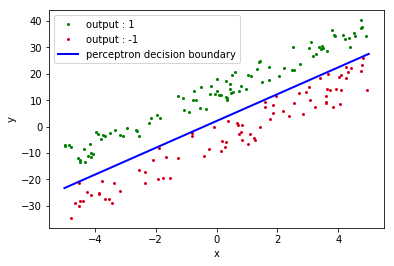

In [65]:
#plotting the decision boundary with training data points
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")

x_boundary = np.linspace(-5,5,2)
y_boundary = (-weights_perceptron[1]/weights_perceptron[2])*x_boundary +(-weights_perceptron[0]/weights_perceptron[2])

plt.plot(x_boundary, y_boundary, color='blue', linewidth = 2, marker='o', 
         markerfacecolor='blue', markersize=0,
         label="perceptron decision boundary")
#plt.plot([-5,5],[-22,28],color='yellow', linewidth = 2, marker='o', 
#markerfacecolor='blue', markersize=0,label="original separation line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


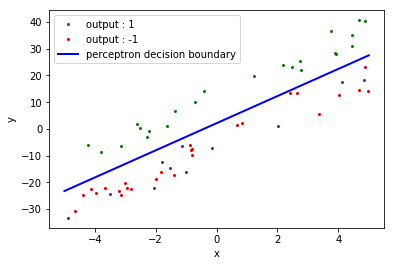

In [66]:
#plotting the decision boundary with testing data points
x_green_test = []
y_green_test = []
x_red_test = []
y_red_test = []
for i in range(len(test_data)):
    if(test_data[i][1]==1):
        x_green_test.append(test_data[i][0][1])
        y_green_test.append(test_data[i][0][2])
    elif (test_data[i][1]==-1):
        x_red_test.append(test_data[i][0][1])
        y_red_test.append(test_data[i][0][2])
      
plt.plot(x_green_test, y_green_test, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red_test, y_red_test, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")
plt.plot(x_boundary, y_boundary, color='blue', linewidth = 2, marker='o', 
         markerfacecolor='blue', markersize=0,
         label="perceptron decision boundary")

#plt.plot([-5,5],[-22,28],color='yellow', linewidth = 2, marker='o', 
#markerfacecolor='blue', markersize=0,label="original separation line")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## **Implementing hard-margin SVM algorithm on the linearly separable data generated above:**

In [67]:
def svm(train_data):
  
  N = len(train_data)
  P = []

  for i in range(N):
    for j in range(N):
      P.append(train_data[j][1]*train_data[i][1]*(np.dot(train_data[j][0][1:],
                                                         train_data[i][0][1:])))
    
  P = matrix(P,(N,N))

  q = np.ones((N,))*-1
  q = matrix(q)

  A = np.zeros((N,))

  for i in range(N):
    A[i]=(train_data[i][1])
  
  A = matrix(A,(1,N))


  b = [0.0]
  b = matrix(b)

  G = np.identity(N)*-1
  G = matrix(G)


  h = np.zeros((N,))
  h = matrix(h)

  alpha = solvers.qp(P, q, G, h, A, b)

  a = []
  for i in range(N):
    a.append(alpha['x'][i])

  weights = [0,0]

  for i in range(N):
    weights[0] += alpha['x'][i]*train_data[i][1]*train_data[i][0][1]
    weights[1] += alpha['x'][i]*train_data[i][1]*train_data[i][0][2]

  bias = (1/train_data[a.index(max(a))][1]) - (weights[0]*train_data[a.index(max(a))][0][1] + weights[1]*train_data[a.index(max(a))][0][2])
  
  return weights,bias


weights_svm,bias = svm(train_data)
print(weights_svm,bias)

[-1.5843752437204646, 0.3179028344668089] -1.654092978663722


## **Visualizing the decision boundary generated by hard-margin SVM:**

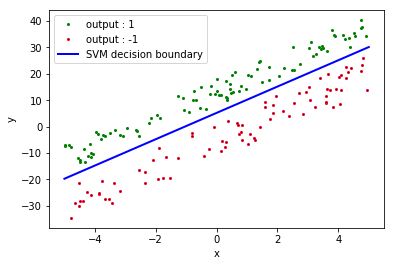

In [68]:
#plotting the decision boundary with training data points
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")

x_boundary_svm = np.linspace(-5,5,2)
y_boundary_svm = (-weights_svm[0]/weights_svm[1])*x_boundary_svm +(-bias/weights_svm[1])

plt.plot(x_boundary_svm, y_boundary_svm, color='blue', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=0,
         label="SVM decision boundary")
#plt.plot([-5,5],[-22,28],color='yellow', linewidth = 2, marker='o', 
#markerfacecolor='blue', markersize=0,label="original separation line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

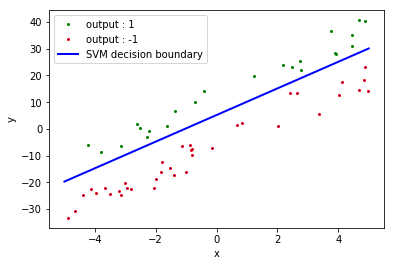

In [69]:
#plotting the decision boundary with testing data points

plt.plot(x_green_test, y_green_test, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red_test, y_red_test, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")
x_boundary_svm = np.linspace(-5,5,2)
y_boundary_svm = (-weights_svm[0]/weights_svm[1])*x_boundary_svm +(-bias/weights_svm[1])

plt.plot(x_boundary_svm, y_boundary_svm, color='blue', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=0,
         label="SVM decision boundary")
#plt.plot([-5,5],[-22,28],color='yellow', linewidth = 2, marker='o', 
#markerfacecolor='blue', markersize=0,label="original separation line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We can observe from the above plots that the SVM chooses a decision boundary with maximum margin; so, it will be able to handle noise (in testing data) better than PLA.

## **Comparing decision boundary generated by PLA and SVM:**


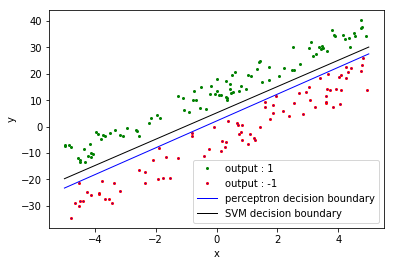

In [70]:
plt.plot(x_green, y_green, color='green', linewidth = 0, marker='o', 
         markerfacecolor='green', markersize=2,label="output : 1")
plt.plot(x_red, y_red, color='red', linewidth = 0, marker='o', 
         markerfacecolor='blue', markersize=2,label="output : -1")

plt.plot(x_boundary, y_boundary, color='blue', linewidth = 1, marker='o', 
         markerfacecolor='blue', markersize=0,
         label="perceptron decision boundary")
plt.plot(x_boundary_svm, y_boundary_svm, color='black', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=0,
         label="SVM decision boundary")
#plt.plot([-5,5],[-22,28],color='yellow', linewidth = 2, marker='o', 
#markerfacecolor='blue', markersize=0,label="original separation line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [71]:
#Error function for perceptron and SVM
def error_perceptron(data, weights):
  
  e=0
  for i in range(len(data)):
    x = np.array(data[i][0])
    yn = data[i][1]
    yn_predicted = sign(np.matmul(weights.T,x))
    e = e + (yn-yn_predicted)**2
    
  return e**0.5


def error_svm(data, weights, bias):
  
  e=0
  for i in range(len(data)):
    
    x = np.array(data[i][0])
    yn = data[i][1]
    
    weights_s = np.array(weights)
    weights_s = np.concatenate(([bias],weights_svm))
    
    yn_predicted = sign(np.matmul(weights_s.T,x))
    e = e + (yn-yn_predicted)**2
    
  return e**0.5

print(error_perceptron(test_data, weights_perceptron), error_svm(test_data, 
                                                                 weights_svm, 
                                                                 bias))

0.0 0.0


## **Implementing soft-margin SVM algorithm on noisy data:**

Soft-margin SVM is a variant of hard-margin SVM; it can be applied on (slighty) non-linearly separable data.

In [0]:
def add_noise(data, sd):
  
  '''function to add gaussian noise with mean=0 and 
  standard deviation=sd in the data'''
  
  ans = copy.deepcopy(data)
  noise_x = np.random.normal(0, sd, (len(data),))
  noise_y = np.random.normal(0, sd*10, (len(data),))
  
  for i in range(len(data)):
    
    ans[i][0][1] += noise_x[i]
    ans[i][0][2] += noise_y[i]
    
  return list(ans)


In [0]:
def svm_soft(train_data, c):
  
  N = len(train_data)
  P = []

  for i in range(N):
    for j in range(N):
      P.append(train_data[j][1]*train_data[i][1]*(np.dot(train_data[j][0][1:],
                                                         train_data[i][0][1:])))
    
  P = matrix(P,(N,N))

  q = np.ones((N,))*-1
  q = matrix(q)

  A = np.zeros((N,))

  for i in range(N):
    A[i]=(train_data[i][1])
  
  A = matrix(A,(1,N))


  b = [0.0]
  b = matrix(b)

  #G = np.identity(N)*-1
  #G = matrix(G)


  #h = np.zeros((N,))
  #h = matrix(h)
  
  G = matrix(np.vstack((np.eye(N)*-1,np.eye(N))))
  h = matrix(np.hstack((np.zeros(N), np.ones(N) * c)))

  alpha = solvers.qp(P, q, G, h, A, b)

  a = []
  for i in range(N):
    a.append(alpha['x'][i])

  weights = [0,0]

  for i in range(N):
    weights[0] += alpha['x'][i]*train_data[i][1]*train_data[i][0][1]
    weights[1] += alpha['x'][i]*train_data[i][1]*train_data[i][0][2]

  bias = (1/train_data[a.index(max(a))][1]) - (weights[0]*train_data[a.index(max(a))][0][1] + weights[1]*train_data[a.index(max(a))][0][2])
  
  return weights,bias


In [0]:
def cross_validation(data ,c, k):
  
  '''returns cross validation error by applying k-fold cross validation 
     by training data with soft_svm 
  '''
  
  error_cv = 0
  folds = {}
  len_fold = int(len(data)/k)
  
  for i in range(k):
    folds[i] = data[i*len_fold:(i+1)*len_fold]
	
  for i in range(k):
    data_cv = {'data_val' : folds[i]}
    
    l=list(range(k))
    l.pop(i)
    data_train = folds[l[0]]
    l.pop(0)
		
    for item in l:
      data_train = data_train + folds[item]
    
    data_cv['data_train'] = data_train
		
    weights, bias = svm_soft(data_cv['data_train'], c)
    error = error_svm(data_cv['data_val'], weights, bias)
    error_cv = error_cv + error
   
  return error_cv/k
    
  
  
def solve_svm_soft(data, k):
  
  '''returns final weights and bias by choosing appropriate value of c 
  using cross validation
  '''
  C = np.linspace(0,20,15)
  

  cv_e = []
  for item in C:
  
    e = cross_validation(data, item, k)
    cv_e.append(e)
    
  
  weights, bias = svm_soft(data, C[cv_e.index(min(cv_e))])
  return weights, bias


sd_noise = np.linspace(0,0.5,10)

w_ssvm = np.zeros((sd_noise.shape[0],2))
b_ssvm = np.zeros((sd_noise.shape[0],))


for i in range(sd_noise.shape[0]):
  
  data_n = add_noise(train_data, sd_noise[i])
  weights_ssvm, bias_s = solve_svm_soft(data_n, 5)
  w_ssvm[i] = weights_ssvm
  b_ssvm[i] = bias_s

## **Comparing the performance of PLA, hard-margin SVM and soft-margin SVM:**

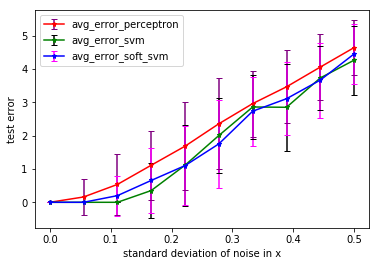

In [75]:
sd_noise = np.linspace(0,0.5,10)

errors_p = np.zeros((50,10))
errors_s = np.zeros((50,10))
errors_ss = np.zeros((50,10))

for i in range(50):
  
  e_p=[]
  e_s=[]
  e_ss=[]
  
  for j in range(sd_noise.shape[0]):
    
    test_data_noisy = add_noise(test_data, sd_noise[j])
    
    e_p.append(error_perceptron(test_data_noisy, weights_perceptron))
   
    e_s.append(error_svm(test_data_noisy, weights_svm, bias))
    e_ss.append(error_svm(test_data_noisy, w_ssvm[j], b_ssvm[j]))
  
  
  errors_p[i] = np.array(e_p)
  errors_s[i] = np.array(e_s)
  errors_ss[i] = np.array(e_ss)
  
  
e_p_avg = np.mean(errors_p,axis = 0)
e_s_avg = np.mean(errors_s,axis = 0)
e_p_sd = np.std(errors_p,axis = 0)
e_s_sd = np.std(errors_s,axis = 0)
e_ss_avg = np.mean(errors_ss,axis = 0)
e_ss_sd = np.std(errors_ss,axis = 0)

plt.errorbar(sd_noise, e_p_avg, yerr = e_p_sd,color='red', ecolor='purple',
             marker='*',markersize=5,capsize=3,label='avg_error_perceptron')
plt.xlabel("standard deviation of noise in x")
plt.ylabel("test error")
  
plt.errorbar(sd_noise, e_s_avg, yerr = e_s_sd, color = 'green', ecolor='black',
             marker='*',markersize=5,capsize=3,label='avg_error_svm')
plt.errorbar(sd_noise, e_ss_avg, yerr = e_ss_sd,color='blue', ecolor='magenta',
             marker='*',markersize=5,capsize=3,label='avg_error_soft_svm')

plt.legend()
plt.show()
  

It can be observed from the above plot that with an increase in noise in the test data, the test error increases for all the 3 models. However, the the increase in test error is sharper in PLA as compared to SVM. This is because SVM can handle the noise in a much better way as compared to PLA. It can be noticed that for first 3 data points (i.e., for slight noise in test data ), test error of SVM does not increase at all, making SVM a robust model for classification for the data that is almost linearly separable.